In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import random
pd.set_option('display.max_columns', None)

## Loading data from S3

In [2]:
# s3_uri = "s3://aws-athena-query-results-378141045805-eu-west-1/primary/e28fee6c-ad6a-429f-9a52-8dff2c0481c3.csv"

In [3]:
# Path to the local data
# The variable name is kept unchanged for future references
s3_uri = "/home/q621464/Desktop/Thesis/code/decision-transformer-thesis/data/smart-climate-2021/e28fee6c-ad6a-429f-9a52-8dff2c0481c3.csv"

In [4]:
climate_data_2021_original = pd.read_csv(s3_uri)
climate_data_2021 = climate_data_2021_original.copy()
climate_data_2021.shape

(176374, 69)

In [9]:
climate_data_2021.groupby(['c_van17', 'c_driveid']).count()

,,c_drive_timestamp_start,c_drive_timestamp_stop,c_msg_creation_timestamp,c_target_temp,c_blower_combined,c_air_mode_combined,c_blower_level,c_min_diff_ms_blower_level,c_blower_style,c_min_diff_ms_blower_style,c_air_dist,c_min_diff_ms_air_dist,c_auto_mode,c_min_diff_ms_auto_mode,c_pwf,c_pwf_group,c_row_number_drive,c_number_of_rows_drive,c_only_driving_duration_sec,c_event_duration_sec,c_min_diff_ms_target_temp,c_min_exteriortemperature_celsius,c_exteriortemperature_avg_celsius,c_max_exteriortemperature_celsius,c_interiortemperature_startup_celsius,c_drive_duration_sec,c_drive_duration_minutes,c_drive_weekday,c_year_month_day,c_weekofyear_year,c_weekend_drive,c_vehicle_live_time_days,c_avg_drives_per_day,c_avg_drives_per_week,c_avg_drives_per_month,c_timezonedelta,c_gpsregion_city_drive,c_gpsregion_lat_drive,c_gpsregion_long_drive,c_gpsregion_geohash_drive,c_gps_data_source,c_hub,c_country_iso_code,c_order_country,c_brand,c_derivat,c_marketing_name,c_steering_wheel_position,c_product_line,c_hybridkennzeichen,c_fuel_type_corrected_description,c_vehicle_class,c_script_version,c_mean_speed,c_mileage_start,c_mileage_stop,c_mileage_delta,c_bcbehvenergystart_kwh,c_bcbehvenergyend_kwh,c_drive_number_per_car,c_number_of_drives_per_car,c_gcad,c_is_active_profile,c_is_guest_profile,c_touchscreen_used,c_touchscreen_used_count,c_first_last_mode
c_van17,c_driveid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAI++FbFvGFjTRtS+sYQxbLNvUQn4kc+hsP0LGI6S3ve484oWiQVcmGw3udQnFvgGSoKPoNiCuc++IFC/qWCrRGi3ivdX+XTk8huALwG7i7iDPWmRhk=,XDVU1W32WZQ9VWHLM,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,0,0,0,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
AAI+26A37RgahMuzcWes4C9Hv4JkH1vGrsUmlWEPfY8bd9alJGFXAxyPtUf5h4tKEXEDHM+645pw41cn5rU84JZZqTul+RQi/xEDmrz5otuKNOR5FDk=,15C7XN9MTXQ7ZR8NE,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
AAI+7mTyMJjfnMPfU+XvKO3HHyzmfBes7caWhgEJJPgkRsFFVc5+alL9rGS6BfwGBI4VExS719qOg7tqGSUK55cvJ7xZA8BoYAHxu6SgKuyjwKMyeWw=,NBMCRAN0THQGPEEKS,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,0,0,16,16,16,16,16,16,16,16
AAI+DfQDiYeMURNBU0dTogguwdbaJBBx9EjUlbwLTZj+MP8BRrArZJo9WEkvoDtVeK599S8w9F+dBnQnQJsuem98BLCwLby2IxS1w1rPxEBdV+sU0Fs=,95F7ERPUHLQG32GTG,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,0,0,0,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,0,0,15,15,15,15,15,15,15,15
AAI+IitPzy4O25EL9NovKdeUbMX1oA/VG1v0k9Rno9243ary5+fZk22BHuLr589CnisIZqaMMKJFR4tr5rO/0wjVYnzbQKKPAx59frAmL6lPQn2mgH8=,UGTNSP6PXFQYXJEED,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAPztGrxkOpS+Y4Muorqm7CIMpCl3qnQxwznZid4GYd90jnSGaGvaX+H5bNUvpZsOB0khiqPyP2dleJgVq428b7zRO2rvzHt/2Hls6CSjFgBxEDF7yI=,T0WM5S4ZB4QFGY21F,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
AAPzwJ1qR2Nw+u1zXpqT9uoVf23PFzBqIMvj9hab1cxL1YiGjwNQHFS9ewhLm8IBB6yhh7Co+wE4P/gG1GHS3yawKAxfsLU3p/njQaiTtacGg63Hl4g=,TE2PZ4SAZ1QGTLG21,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17

In [5]:
climate_data_2021.head()

,c_van17,c_driveid,c_drive_timestamp_start,c_drive_timestamp_stop,c_msg_creation_timestamp,c_target_temp,c_blower_combined,c_air_mode_combined,c_blower_level,c_min_diff_ms_blower_level,c_blower_style,c_min_diff_ms_blower_style,c_air_dist,c_min_diff_ms_air_dist,c_auto_mode,c_min_diff_ms_auto_mode,c_pwf,c_pwf_group,c_row_number_drive,c_number_of_rows_drive,c_only_driving_duration_sec,c_event_duration_sec,c_min_diff_ms_target_temp,c_min_exteriortemperature_celsius,c_exteriortemperature_avg_celsius,c_max_exteriortemperature_celsius,c_interiortemperature_startup_celsius,c_drive_duration_sec,c_drive_duration_minutes,c_drive_weekday,c_year_month_day,c_weekofyear_year,c_weekend_drive,c_vehicle_live_time_days,c_avg_drives_per_day,c_avg_drives_per_week,c_avg_drives_per_month,c_timezonedelta,c_gpsregion_city_drive,c_gpsregion_lat_drive,c_gpsregion_long_drive,c_gpsregion_geohash_drive,c_gps_data_source,c_hub,c_country_iso_code,c_order_country,c_brand,c_derivat,c_marketing_name,c_steering_wheel_position,c_product_line,c_hybridkennzeichen,c_fuel_type_corrected_description,c_vehicle_class,c_script_version,c_mean_speed,c_mileage_start,c_mileage_stop,c_mileage_delta,c_bcbehvenergystart_kwh,c_bcbehvenergyend_kwh,c_drive_number_per_car,c_number_of_drives_per_car,c_gcad,c_is_active_profile,c_is_guest_profile,c_touchscreen_used,c_touchscreen_used_count,c_first_last_mode
0,AAOR8ycnhk+g59Qlb3CesnGXOxEP0kucNid6FrcnlhY9EP...,63EVC1UH5AQ90EZMF,2021-05-20 06:30:37.627,2021-05-20 06:52:29.125,2021-05-20 06:30:37.899,18.5,Off,OFF,Off,258.0,KS_1,193.0,MITTE,inf,AUTO_OFF,2195.0,STAFKT_KUNDE_NICHT_IM_FZG,STAFKT_KUNDE_NICHT_IM_FZG,1,16,1026,0,1.0,35.0,36.0,37.0,25.7,1312,21.9,Thu,2021_5_20,20_2021,False,789.01,2.26,15.82,68.79,8.0,NaN,NaN,NaN,NaN,not_available,CN,NaN,CN,BMW,G08,iX3,LL,LK,BEVE,electrical,KKL+,MGUV6,14.86,5212.9,5218.35,5.45,NaN,NaN,902,1782,NOT VALID GCAD,False,False,True,63,OFF -> OFF
1,AAOR8ycnhk+g59Qlb3CesnGXOxEP0kucNid6FrcnlhY9EP...,63EVC1UH5AQ90EZMF,2021-05-20 06:30:37.627,2021-05-20 06:52:29.125,2021-05-20 06:30:37.900,20.0,Off,OFF,Off,258.0,KS_1,193.0,MITTE,inf,AUTO_OFF,2195.0,STAFKT_KUNDE_NICHT_IM_FZG,STAFKT_KUNDE_NICHT_IM_FZG,2,16,1026,24,1.0,35.0,36.0,37.0,25.7,1312,21.9,Thu,2021_5_20,20_2021,False,789.01,2.26,15.82,68.79,8.0,NaN,NaN,NaN,NaN,not_available,CN,NaN,CN,BMW,G08,iX3,LL,LK,BEVE,electrical,KKL+,MGUV6,14.86,5212.9,5218.35,5.45,NaN,NaN,902,1782,NOT VALID GCAD,False,False,True,63,OFF -> OFF
2,AAOR8ycnhk+g59Qlb3CesnGXOxEP0kucNid6FrcnlhY9EP...,63EVC1UH5AQ90EZMF,2021-05-20 06:30:37.627,2021-05-20 06:52:29.125,2021-05-20 06:31:01.323,20.0,Off,OFF,Off,258.0,KS_5,193.0,MITTE,inf,AUTO_OFF,2195.0,WOHNEN,WOHNEN,3,16,1026,5,1.0,35.0,36.0,37.0,25.7,1312,21.9,Thu,2021_5_20,20_2021,False,789.01,2.26,15.82,68.79,8.0,NaN,NaN,NaN,NaN,not_available,CN,NaN,CN,BMW,G08,iX3,LL,LK,BEVE,electrical,KKL+,MGUV6,14.86,5212.9,5218.35,5.45,NaN,NaN,902,1782,NOT VALID GCAD,False,False,True,63,OFF -> OFF
3,AAOR8ycnhk+g59Qlb3CesnGXOxEP0kucNid6FrcnlhY9EP...,63EVC1UH5AQ90EZMF,2021-05-20 06:30:37.627,2021-05-20 06:52:29.125,2021-05-20 06:31:06.786,20.0,Off,OFF,Off,258.0,KS_5,193.0,MITTE,inf,AUTO_OFF,2195.0,FAHREN,FAHREN,4,16,1026,18,1.0,35.0,36.0,37.0,25.7,1312,21.9,Thu,2021_5_20,20_2021,False,789.01,2.26,15.82,68.79,8.0,NaN,NaN,NaN,NaN,not_available,CN,NaN,CN,BMW,G08,iX3,LL,LK,BEVE,electrical,KKL+,MGUV6,14.86,5212.9,5218.35,5.45,NaN,NaN,902,1782,NOT VALID GCAD,False,False,True,63,OFF -> OFF
4,AAOR8ycnhk+g59Qlb3CesnGXOxEP0kucNid6FrcnlhY9EP...,63EVC1UH5AQ90EZMF,2021-05-20 06:30:37.627,2021-05-20 06:52:29.125,2021-05-20 06:31:24.081,16.0,KS_5,AUTO,BL_5,258.0,KS_5,193.0,MITTE,inf,AUTO_ON,2195.0,FAHREN,FAHREN,5,16,1026,3,1.0,35.0,36.0,37.0,25.7,1312,21.9,Thu,2021_5_20,20_2021,False,789.01,2.26,15.82,68.79,8.0,NaN,NaN,NaN,NaN,not_available,CN,NaN,CN,BMW,G08,iX3,LL,LK,BEVE,electrical,KKL+,MGUV6,14.86,5212.9,5218.35,5.45,NaN,NaN,902,1782,NOT VALID GCAD,False,False,True,63,OFF -> OFF


In [6]:
not_relevant_columns = [
    'c_min_diff_ms_blower_level',
    'c_min_diff_ms_blower_style',
    'c_min_diff_ms_air_dist',
    'c_min_diff_ms_auto_mode',
    'c_min_diff_ms_target_temp',
    'c_interiortemperature_startup_celsius',
    'c_vehicle_live_time_days',
    'c_gpsregion_geohash_drive',
    'c_gps_data_source',
    'c_hub',
#     'c_country_iso_code',
#     'c_hybriennzeichen',
    'c_bcbehvenergystart_kwh',
    'c_bcbehvenergyend_kwh',
#     'c_touchscreen_used_count',
    'c_first_last_mode',
]
not_relevant_columns

['c_min_diff_ms_blower_level',
 'c_min_diff_ms_blower_style',
 'c_min_diff_ms_air_dist',
 'c_min_diff_ms_auto_mode',
 'c_min_diff_ms_target_temp',
 'c_interiortemperature_startup_celsius',
 'c_vehicle_live_time_days',
 'c_gpsregion_geohash_drive',
 'c_gps_data_source',
 'c_hub',
 'c_bcbehvenergystart_kwh',
 'c_bcbehvenergyend_kwh',
 'c_first_last_mode']

In [7]:
climate_data_2021 = climate_data_2021.drop(columns = not_relevant_columns)
climate_data_2021.shape

(176374, 56)

## Missing values check

In [8]:
missing_vals_check = climate_data_2021.isna().sum()

In [9]:
missing_val_feature_and_count = missing_vals_check[missing_vals_check>0]
missing_val_cols = missing_val_feature_and_count.keys().tolist()
missing_val_cols

['c_timezonedelta',
 'c_gpsregion_city_drive',
 'c_gpsregion_lat_drive',
 'c_gpsregion_long_drive',
 'c_country_iso_code']

In [10]:
# Dropt the columns with missing values
climate_data_2021 = climate_data_2021.drop(missing_val_cols, axis=1)
climate_data_2021.shape

(176374, 51)

In [11]:
climate_data_2021.isna().sum()

c_van17                              0
c_driveid                            0
c_drive_timestamp_start              0
c_drive_timestamp_stop               0
c_msg_creation_timestamp             0
c_target_temp                        0
c_blower_combined                    0
c_air_mode_combined                  0
c_blower_level                       0
c_blower_style                       0
c_air_dist                           0
c_auto_mode                          0
c_pwf                                0
c_pwf_group                          0
c_row_number_drive                   0
c_number_of_rows_drive               0
c_only_driving_duration_sec          0
c_event_duration_sec                 0
c_min_exteriortemperature_celsius    0
c_exteriortemperature_avg_celsius    0
c_max_exteriortemperature_celsius    0
c_drive_duration_sec                 0
c_drive_duration_minutes             0
c_drive_weekday                      0
c_year_month_day                     0
c_weekofyear_year        

## Uniquely identifyable cars

In [ ]:
group_by_columns = ['c_marketing_name', 
     'c_steering_wheel_position', 
     'c_brand', 
     'c_product_line',
     'c_derivat',
     'c_brand',
     'c_order_country',
     'c_hybridkennzeichen',
     'c_vehicle_class',
    ]

In [ ]:
# We are not using this rather using the c_van17
total_uniq_cars = climate_data_2021.groupby(
    group_by_columns).count()
print(f"Total number of uniquely identifyable cars: {total_uniq_cars.shape[0]}")

## Number of events per drive

In [12]:
# Getting the number of events per drive
number_of_events_per_drive = climate_data_2021['c_driveid'].value_counts()
# min, max, mean and median event count per drive
number_of_events_per_drive.min(), number_of_events_per_drive.max(), number_of_events_per_drive.mean(), number_of_events_per_drive.median()

(15, 88, 17.6374, 16.0)

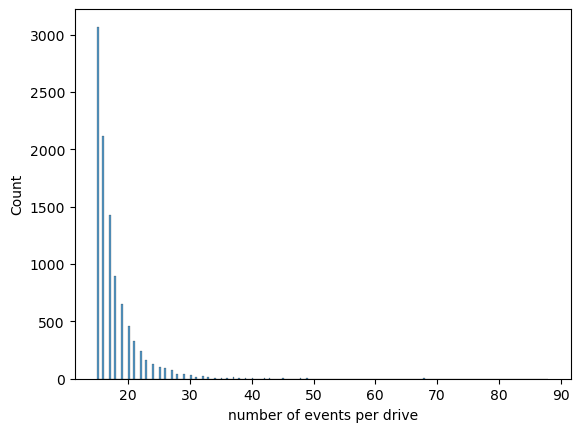

In [13]:
sns.histplot(number_of_events_per_drive)
plt.xlabel('number of events per drive')
plt.show()

## Drive count per car

In [64]:
drive_per_van = climate_data_2021.groupby('c_van17')['c_driveid'].nunique()
drive_per_van.min(), drive_per_van.max(), drive_per_van.mean(), drive_per_van.median()

(1, 4, 1.0264832683227263, 1.0)

In [ ]:
# We are not using this anymore since we are using the c_van17 for identifying vehicles

# drive_count_per_car = climate_data_2021.groupby(
#     group_by_columns).count()
# print(f"Total number of uniquely identifyable cars: {drive_count_per_car.shape[0]}")

In [14]:
drive_count_per_car = climate_data_2021['c_van17'].value_counts()
print(f"Total number of unique vehicles: {drive_count_per_car.shape[0]}")

Total number of unique vehicles: 9742


In [15]:
# min, max, mean and median number of drives per car
drive_count_per_car.min(), drive_count_per_car.max(), drive_count_per_car.mean(), drive_count_per_car.median()

(15, 107, 18.104495996715254, 16.0)

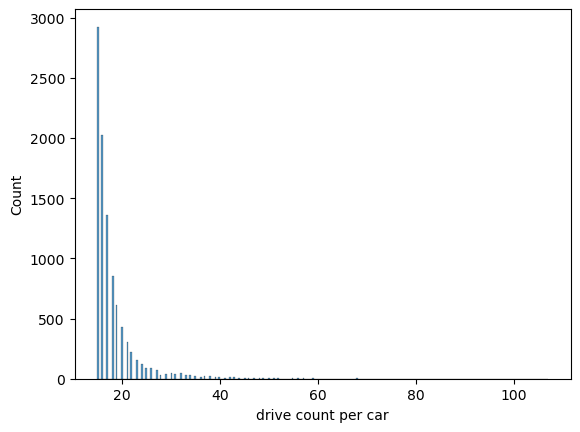

In [16]:
# Drive count per car distribution
sns.histplot(drive_count_per_car)
plt.xlabel('drive count per car')
plt.show()

## Check the status of the vechile when the event happened

In [123]:
climate_data_2021['c_pwf_group'].unique()

array(['STAFKT_KUNDE_NICHT_IM_FZG', 'WOHNEN', 'FAHREN', 'PARKEN_BN_IO'],
      dtype=object)

In [114]:
only_fahren_data = climate_data_2021[climate_data_2021['c_pwf_group'] == 'FAHREN']

In [118]:
(only_fahren_data['c_driveid'].value_counts() >= 15).sum()

1118

In [112]:
pwf_group_status_per_drive = climate_data_2021.groupby('c_driveid')['c_pwf'].nunique()

In [89]:
pwf_group_status_per_drive.shape

(10000,)

In [120]:
first_pwf_group_status_per_drive = climate_data_2021.groupby('c_driveid')['c_pwf_group'].first()

In [121]:
first_pwf_group_status_per_drive

c_driveid
0000HR5MBWQ67BX7Y    STAFKT_KUNDE_NICHT_IM_FZG
003G0YGN49Q8FSD6C                       WOHNEN
007Y6B5N3NQ3V784T                       WOHNEN
008M99XMUTQKUSLFB    STAFKT_KUNDE_NICHT_IM_FZG
008TW5EL5KQWW9KZP                       FAHREN
                               ...            
ZZ1M05B75WQEY06Y6                       WOHNEN
ZZ6P08NDBAQRSRLH1                       WOHNEN
ZZASNZHK4SQ2JKHCL    STAFKT_KUNDE_NICHT_IM_FZG
ZZJJ3AX7H0Q7G2RU9    STAFKT_KUNDE_NICHT_IM_FZG
ZZMP7SUTKPQ8HCRKT                       FAHREN
Name: c_pwf_group, Length: 10000, dtype: object

([0, 1, 2, 3],
 [Text(0, 0, 'STAFKT_KUNDE_NICHT_IM_FZG'),
  Text(1, 0, 'WOHNEN'),
  Text(2, 0, 'FAHREN'),
  Text(3, 0, 'PARKEN_BN_IO')])

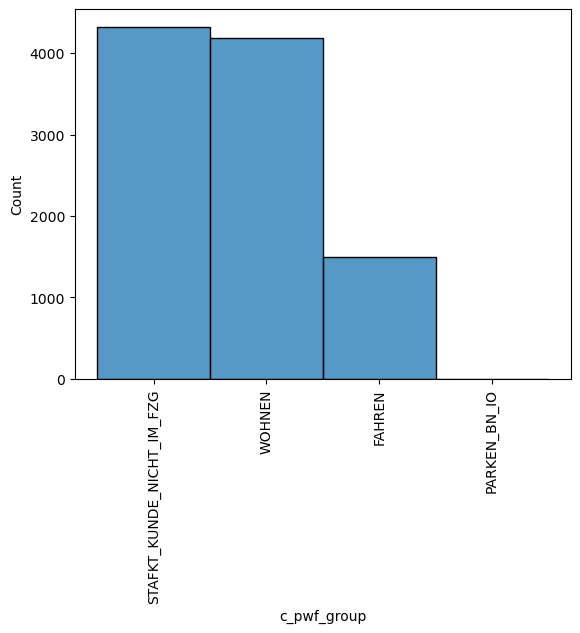

In [122]:
sns.histplot(first_pwf_group_status_per_drive)
plt.xticks(rotation=90)

In [102]:
(first_pwf_group_status_per_drive == 'WOHNEN').sum()

4184

In [95]:
pwf_group_status_per_drive[pwf_group_status_per_drive == 3].shape

(9931,)

## Check the blower status

In [124]:
climate_data_2021.columns

Index(['c_van17', 'c_driveid', 'c_drive_timestamp_start',
       'c_drive_timestamp_stop', 'c_msg_creation_timestamp', 'c_target_temp',
       'c_blower_combined', 'c_air_mode_combined', 'c_blower_level',
       'c_min_diff_ms_blower_level', 'c_blower_style',
       'c_min_diff_ms_blower_style', 'c_air_dist', 'c_min_diff_ms_air_dist',
       'c_auto_mode', 'c_min_diff_ms_auto_mode', 'c_pwf', 'c_pwf_group',
       'c_row_number_drive', 'c_number_of_rows_drive',
       'c_only_driving_duration_sec', 'c_event_duration_sec',
       'c_min_diff_ms_target_temp', 'c_min_exteriortemperature_celsius',
       'c_exteriortemperature_avg_celsius',
       'c_max_exteriortemperature_celsius',
       'c_interiortemperature_startup_celsius', 'c_drive_duration_sec',
       'c_drive_duration_minutes', 'c_drive_weekday', 'c_year_month_day',
       'c_weekofyear_year', 'c_weekend_drive', 'c_vehicle_live_time_days',
       'c_avg_drives_per_day', 'c_avg_drives_per_week',
       'c_avg_drives_per_month', 'c

In [125]:
climate_data_2021[['c_blower_combined', 'c_auto_mode']]

,c_blower_combined,c_auto_mode
0,Off,AUTO_OFF
1,Off,AUTO_OFF
2,Off,AUTO_OFF
3,Off,AUTO_OFF
4,KS_5,AUTO_ON
...,...,...
176369,BL_9,AUTO_OFF
176370,BL_9,AUTO_OFF
176371,Off,AUTO_OFF
176372,Off,AUTO_OFF


In [126]:
climate_data_2021['c_auto_mode'].unique()

array(['AUTO_OFF', 'AUTO_ON'], dtype=object)

## Event duration across all events

In [17]:
# Average event duration in seconds among all drives
climate_data_2021['c_event_duration_sec'].min(), climate_data_2021['c_event_duration_sec'].max(), climate_data_2021['c_event_duration_sec'].mean(), climate_data_2021['c_event_duration_sec'].median()

(0, 15714, 344.8267318312223, 86.0)

##### TODO: Why 0 seconds?

In [18]:
# Total number of events with 0 second duration
(climate_data_2021['c_event_duration_sec'] == 0).sum()

1804

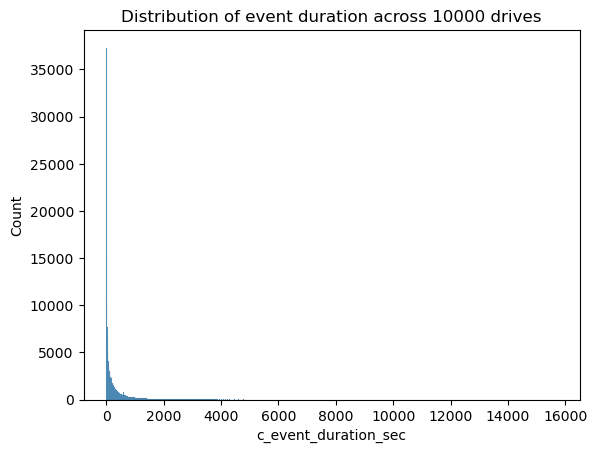

In [19]:
event_durations = climate_data_2021['c_event_duration_sec']
sns.histplot(event_durations)
plt.title(f"Distribution of event duration across {climate_data_2021['c_driveid'].nunique()} drives")
plt.show()

## Elapsed time between the drive start and the occurence of the first event

In [20]:
climate_data_2021['c_drive_timestamp_start'] =  pd.to_datetime(climate_data_2021['c_drive_timestamp_start'])
climate_data_2021['c_msg_creation_timestamp'] = pd.to_datetime(climate_data_2021['c_msg_creation_timestamp'])
climate_data_2021['c_drive_timestamp_stop'] = pd.to_datetime(climate_data_2021['c_drive_timestamp_stop'])

grouped_data = climate_data_2021.groupby('c_driveid')
drive_start_to_first_event = (grouped_data['c_msg_creation_timestamp'].min() - grouped_data['c_drive_timestamp_start'].first()).dt.total_seconds()
drive_start_to_first_event

c_driveid
0000HR5MBWQ67BX7Y    0.945
003G0YGN49Q8FSD6C    0.105
007Y6B5N3NQ3V784T    0.129
008M99XMUTQKUSLFB    0.558
008TW5EL5KQWW9KZP    0.449
                     ...  
ZZ1M05B75WQEY06Y6    0.862
ZZ6P08NDBAQRSRLH1    0.077
ZZASNZHK4SQ2JKHCL    0.166
ZZJJ3AX7H0Q7G2RU9    0.675
ZZMP7SUTKPQ8HCRKT    0.106
Length: 10000, dtype: float64

In [21]:
(drive_start_to_first_event < 1).sum()

9454

In [22]:
drive_start_to_first_event.min(), drive_start_to_first_event.max(), drive_start_to_first_event.mean(), drive_start_to_first_event.median()

(0.001, 7.583, 0.3518887, 0.226)

##### TODO: See the drive status and other relevant features to find out the reason behind 1 ms time diff

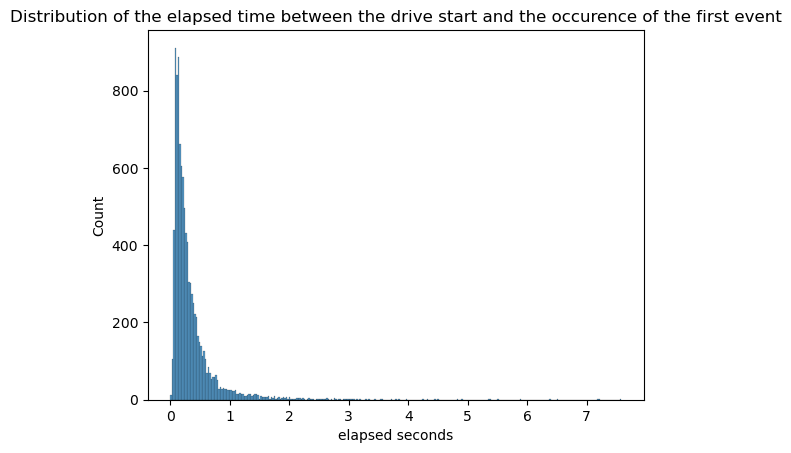

In [23]:
sns.histplot(drive_start_to_first_event)
plt.title('Distribution of the elapsed time between the drive start and the occurence of the first event')
plt.xlabel('elapsed seconds')
plt.show()

In [24]:
# Events that took place after 0 second of the start of the drive
(drive_start_to_first_event==0.0).sum()

0

In [25]:
last_event_to_drive_end = (grouped_data['c_drive_timestamp_stop'].first() - grouped_data['c_msg_creation_timestamp'].max()).dt.total_seconds()

# abs(pd.to_datetime(climate_data_2021.groupby(['c_driveid', 'c_drive_timestamp_stop'])['c_msg_creation_timestamp'].transform("max")) - pd.to_datetime(climate_data_2021['c_drive_timestamp_stop'])).dt.total_seconds() * 1000
last_event_to_drive_end

c_driveid
0000HR5MBWQ67BX7Y    1.781
003G0YGN49Q8FSD6C    1.088
007Y6B5N3NQ3V784T    1.544
008M99XMUTQKUSLFB    1.772
008TW5EL5KQWW9KZP    1.816
                     ...  
ZZ1M05B75WQEY06Y6    2.038
ZZ6P08NDBAQRSRLH1    2.409
ZZASNZHK4SQ2JKHCL    1.346
ZZJJ3AX7H0Q7G2RU9    1.834
ZZMP7SUTKPQ8HCRKT    1.175
Length: 10000, dtype: float64

In [26]:
last_event_to_drive_end.min(), last_event_to_drive_end.max(), last_event_to_drive_end.mean(), last_event_to_drive_end.median()

(0.0, 5692.863, 5.769684599999999, 1.577)

In [27]:
(last_event_to_drive_end==0.0).sum()

9

In [28]:
# sns.histplot(last_event_to_drive_end)
# plt.title('Distribution of the elapsed time between the last event and the drive end time')
# plt.xlabel('elapsed seconds')

## Drive day distribution

In [29]:
# weekday_drive_count = climate_data_2021.groupby('c_drive_weekday').count()
# weekday_drive_count

weekday_drive_counts = climate_data_2021['c_drive_weekday'].value_counts().reset_index()
weekday_drive_counts
weekday_drive_counts.columns = ['Weekday', 'Count']
weekday_drive_counts

,Weekday,Count
0,Sat,30488
1,Fri,28554
2,Sun,27571
3,Thu,23580
4,Mon,23258
5,Tue,21581
6,Wed,21342


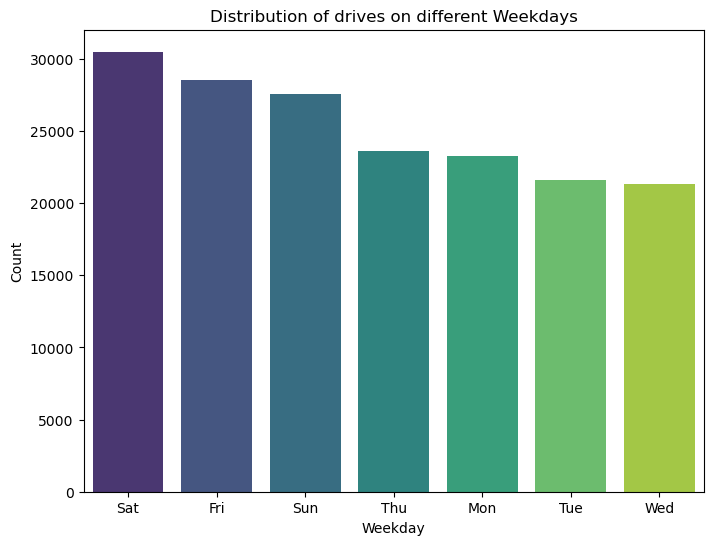

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Weekday', y='Count', data=weekday_drive_counts, palette='viridis')
plt.title('Distribution of drives on different Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

In [31]:
climate_data_2021['c_weekend_drive'].sum()

58370

In [32]:
# Find the drive distribution according to different time intervals
# Convert the 'timestamp' column to datetime type
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define the time intervals
time_intervals = ['01:00-03:00', 
                  '03:00-05:00', 
                  '05:00-07:00',
                  '07:00-09:00', 
                  '09:00-11:00', 
                  '11:00-13:00', 
                  '13:00-15:00', 
                  '15:00-17:00', 
                  '17:00-19:00', 
                  '19:00-21:00', 
                  '21:00-23:00',
                  '23:00-01:00'
                 ]
bins = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

# Create a new column to represent the time interval
climate_data_2021['time_interval'] = pd.cut(pd.to_datetime(climate_data_2021['c_drive_timestamp_start']).dt.hour, bins=bins, labels=time_intervals, right=False)

# Count the number of rides in each time interval
drive_counts = climate_data_2021['time_interval'].value_counts().sort_index().reset_index()
drive_counts.columns = ['Time Interval', 'Drive Counts']

# Print the counts
print("Drive Counts:")
print(drive_counts)

Drive Counts:
   Time Interval  Drive Counts
0    01:00-03:00         11174
1    03:00-05:00         12305
2    05:00-07:00         18334
3    07:00-09:00         19820
4    09:00-11:00         19614
5    11:00-13:00         19834
6    13:00-15:00         18667
7    15:00-17:00         16678
8    17:00-19:00         13682
9    19:00-21:00          9573
10   21:00-23:00          8182
11   23:00-01:00          3620


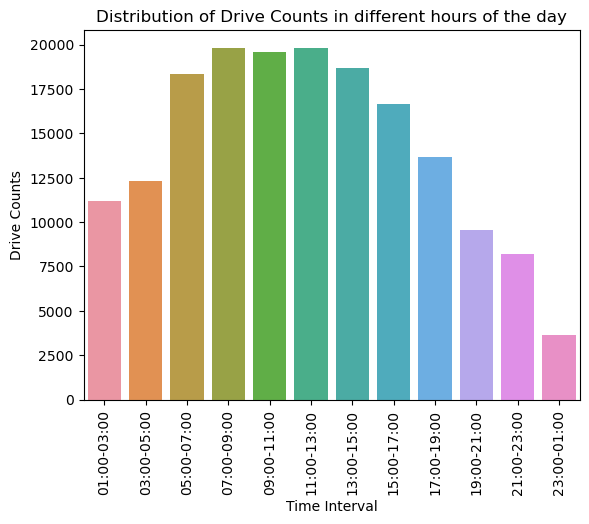

In [33]:
# Plot the distribution

drive_counts
# Plot the barplot
sns.barplot(data=drive_counts, x='Time Interval', y='Drive Counts')
plt.xlabel('Time Interval')
plt.ylabel('Drive Counts')
plt.xticks(rotation=90) 
plt.title('Distribution of Drive Counts in different hours of the day')
plt.show()

## Distribution of the drive duration

In [34]:
unique_drive_durations = climate_data_2021['c_drive_duration_sec'].unique()

In [35]:
# min, max, mean and median drive durations
climate_data_2021['c_drive_duration_sec'].min(), climate_data_2021['c_drive_duration_sec'].max(), climate_data_2021['c_drive_duration_sec'].mean(), climate_data_2021['c_drive_duration_sec'].median()

(80, 17957, 6302.727885062424, 5347.0)

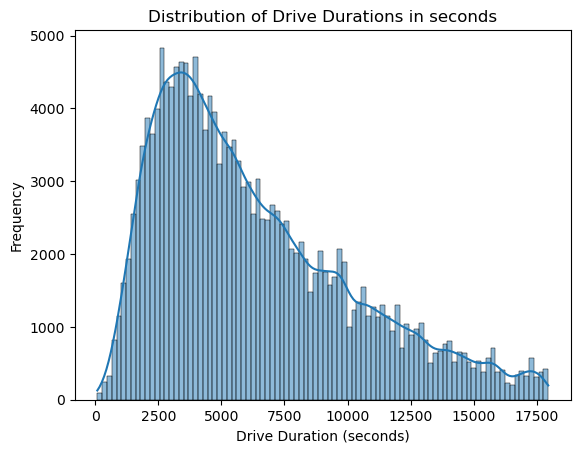

In [36]:
# Plot histogram
sns.histplot(data=climate_data_2021['c_drive_duration_sec'], kde=True)
plt.xlabel('Drive Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Drive Durations in seconds')
plt.show()

In [37]:
# Do longer drives have more events?


### Average time gap between successive events

In [38]:
# Sorting the dataset with c_driveid and c_msg_creation_timestamp ascendingly
climate_data_2021.sort_values(['c_driveid', 'c_msg_creation_timestamp'], inplace=True)

### Analyzing the drive with maximum event count

In [39]:
drive_id_of_max_events = climate_data_2021['c_driveid'].value_counts().idxmax()
drive_id_of_max_events

'DRC585UJ2TQ95ZWRN'

In [41]:
drive_with_highest_events = climate_data_2021[climate_data_2021['c_driveid'] == drive_id_of_max_events]
drive_with_highest_events.shape

(88, 52)

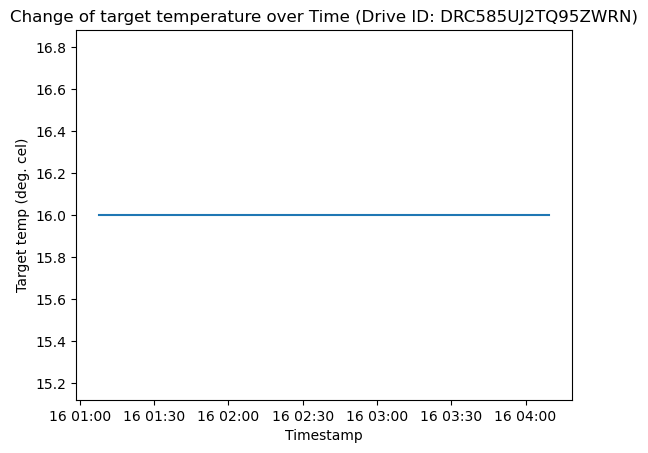

In [42]:
plt.plot(drive_with_highest_events['c_msg_creation_timestamp'], drive_with_highest_events['c_target_temp'])
plt.xlabel('Timestamp')
plt.ylabel('Target temp (deg. cel)')
plt.title('Change of target temperature over Time (Drive ID: {})'.format(drive_id_of_max_events))
plt.show()

### Capturing the event change within drives

##### A event change is defined as a change in the target_temp value

In [43]:
# To see how many unique temp values each drive has - a distribution
climate_data_2021.groupby('c_driveid')['c_target_temp'].nunique().min(), climate_data_2021.groupby('c_driveid')['c_target_temp'].nunique().max(), climate_data_2021.groupby('c_driveid')['c_target_temp'].nunique().mean(), climate_data_2021.groupby('c_driveid')['c_target_temp'].nunique().median()

(1, 14, 3.0269, 3.0)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'UNTEN'),
  Text(1, 0, 'MITTE'),
  Text(2, 0, 'MAX_AC'),
  Text(3, 0, 'MITTE_S_UNTEN'),
  Text(4, 0, 'OBEN_S_MITTE'),
  Text(5, 0, 'OBEN_S_MITTE_S_UNTEN'),
  Text(6, 0, 'OFF'),
  Text(7, 0, 'DEFROST'),
  Text(8, 0, 'OBEN_S_UNTEN'),
  Text(9, 0, 'OBEN')])

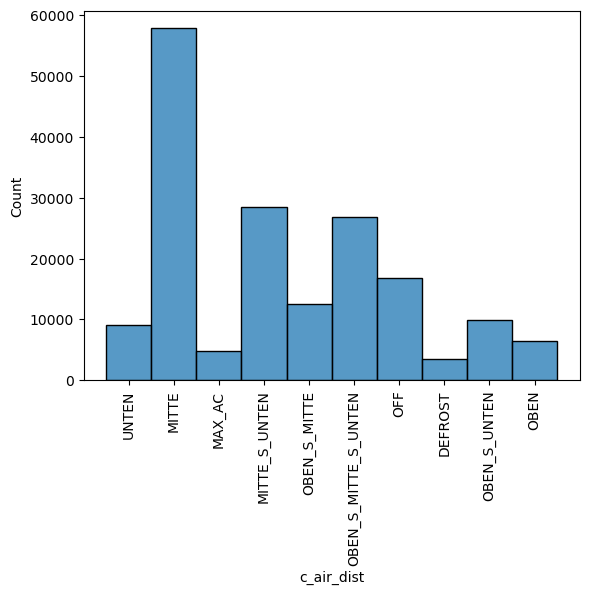

In [57]:
sns.histplot(climate_data_2021.c_air_dist)
plt.xticks(rotation=90)

<Axes: xlabel='c_blower_level', ylabel='Count'>

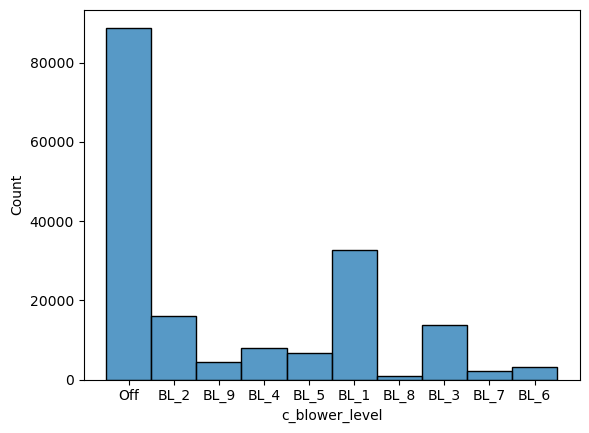

In [47]:
sns.histplot(climate_data_2021.c_blower_level)

In [44]:
# Calculate the difference in target teamp in two successive timestamps for each driveid
climate_data_2021['d_diff_in_target_temp'] = climate_data_2021.sort_values(['c_driveid', 'c_msg_creation_timestamp']).groupby('c_driveid')['c_target_temp'].diff()
climate_data_2021

,c_van17,c_driveid,c_drive_timestamp_start,c_drive_timestamp_stop,c_msg_creation_timestamp,c_target_temp,c_blower_combined,c_air_mode_combined,c_blower_level,c_blower_style,c_air_dist,c_auto_mode,c_pwf,c_pwf_group,c_row_number_drive,c_number_of_rows_drive,c_only_driving_duration_sec,c_event_duration_sec,c_min_exteriortemperature_celsius,c_exteriortemperature_avg_celsius,c_max_exteriortemperature_celsius,c_drive_duration_sec,c_drive_duration_minutes,c_drive_weekday,c_year_month_day,c_weekofyear_year,c_weekend_drive,c_avg_drives_per_day,c_avg_drives_per_week,c_avg_drives_per_month,c_order_country,c_brand,c_derivat,c_marketing_name,c_steering_wheel_position,c_product_line,c_hybridkennzeichen,c_fuel_type_corrected_description,c_vehicle_class,c_script_version,c_mean_speed,c_mileage_start,c_mileage_stop,c_mileage_delta,c_drive_number_per_car,c_number_of_drives_per_car,c_gcad,c_is_active_profile,c_is_guest_profile,c_touchscreen_used,c_touchscreen_used_count,time_interval,d_diff_in_target_temp
99579,AAP0ykjqgedw8N3AwpeOM1M2rrV80LDMbgO1pO/ulSoYD6...,0000HR5MBWQ67BX7Y,2021-03-03 05:57:09.331,2021-03-03 07:07:40.712,2021-03-03 05:57:10.276,21.5,KS_2,OFF,Off,KS_2,UNTEN,AUTO_ON,STAFKT_KUNDE_NICHT_IM_FZG,STAFKT_KUNDE_NICHT_IM_FZG,1,15,4072,0,-3.0,1.75,6.5,4231,70.5,Wed,2021_3_3,9_2021,False,2.10,14.70,63.92,DE,BMW,G16,840d xDrive,LL,LG,NOHY,diesel,GKL+,MGUV6,89.70,23527.65,23633.80,106.15,548,1896,ACTIVE_PROFILE,True,False,True,19,05:00-07:00,NaN
99580,AAP0ykjqgedw8N3AwpeOM1M2rrV80LDMbgO1pO/ulSoYD6...,0000HR5MBWQ67BX7Y,2021-03-03 05:57:09.331,2021-03-03 07:07:40.712,2021-03-03 05:57:10.278,20.5,KS_2,OFF,Off,KS_2,UNTEN,AUTO_ON,STAFKT_KUNDE_NICHT_IM_FZG,STAFKT_KUNDE_NICHT_IM_FZG,2,15,4072,35,-3.0,1.75,6.5,4231,70.5,Wed,2021_3_3,9_2021,False,2.10,14.70,63.92,DE,BMW,G16,840d xDrive,LL,LG,NOHY,diesel,GKL+,MGUV6,89.70,23527.65,23633.80,106.15,548,1896,ACTIVE_PROFILE,True,False,True,19,05:00-07:00,-1.0
99581,AAP0ykjqgedw8N3AwpeOM1M2rrV80LDMbgO1pO/ulSoYD6...,0000HR5MBWQ67BX7Y,2021-03-03 05:57:09.331,2021-03-03 07:07:40.712,2021-03-03 05:57:45.286,20.5,KS_2,OFF,Off,KS_2,UNTEN,AUTO_ON,WOHNEN,WOHNEN,3,15,4072,25,-3.0,1.75,6.5,4231,70.5,Wed,2021_3_3,9_2021,False,2.10,14.70,63.92,DE,BMW,G16,840d xDrive,LL,LG,NOHY,diesel,GKL+,MGUV6,89.70,23527.65,23633.80,106.15,548,1896,ACTIVE_PROFILE,True,False,True,19,05:00-07:00,0.0
99582,AAP0ykjqgedw8N3AwpeOM1M2rrV80LDMbgO1pO/ulSoYD6...,0000HR5MBWQ67BX7Y,2021-03-03 05:57:09.331,2021-03-03 07:07:40.712,2021-03-03 05:58:10.513,20.5,KS_2,OFF,Off,KS_2,UNTEN,AUTO_ON,STAFKT_KUNDE_NICHT_IM_FZG,STAFKT_KUNDE_NICHT_IM_FZG,4,15,4072,30,-3.0,1.75,6.5,4231,70.5,Wed,2021_3_3,9_2021,False,2.10,14.70,63.92,DE,BMW,G16,840d xDrive,LL,LG,NOHY,diesel,GKL+,MGUV6,89.70,23527.65,23633.80,106.15,548,1896,ACTIVE_PROFILE,True,False,True,19,05:00-07:00,0.0
99583,AAP0ykjqgedw8N3AwpeOM1M2rrV80LDMbgO1pO/ulSoYD6...,0000HR5MBWQ67BX7Y,2021-03-03 05:57:09.331,2021-03-03 07:07:40.712,2021-03-03 05:58:40.773,20.5,KS_2,AUTO,BL_2,KS_2,UNTEN,AUTO_ON,WOHNEN,WOHNEN,5,15,4072,9,-3.0,1.75,6.5,4231,70.5,Wed,2021_3_3,9_2021,False,2.10,14.70,63.92,DE,BMW,G16,840d xDrive,LL,LG,NOHY,diesel,GKL+,MGUV6,89.70,23527.65,23633.80,106.15,548,1896,ACTIVE_PROFILE,True,False,True,19,05:00-07:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109610,AAIOqy1qhNnVcRxlRx1QR5euDKKhEr6D65Kb/apHDH7Ig1...,ZZMP7SUTKPQ8HCRKT,2021-09-05 12:25:51.350,2021-09-05 14:23:52.098,2021-09-05 13:23:20.159,20.0,KS_4,AUTO,BL_4,KS_4,UNTEN,AUTO_ON,FAHREN,FAHREN,11,15,5977,2488,20.0,22.00,24.0,7081,118.0,Sun,2021_9_5,35_2021,True,1.04,7.28,31.65,GB,BMW,G29,Z4 sDrive20i,RL,LK,NOHY,petrol,KKL+,MGUV6,35.06,1923.10,1992.05,68.95,90,563,ACTIVE_PROFILE,True,False,True,9,11:00-13:00,0.0
109611,AAIOqy1qhNnVcRxlRx1QR5euDKKhEr6D65Kb/apHDH7Ig1...,ZZMP7SUTKPQ8HCRKT,2021-09-05 12:25:51.350,2021-09-05 14:23:52.098,2021-09-05 14:04:48.010,20.0

#### Curate the dataset
1. delete the drives which had only temperatures 16 and 28
2. delete the events where there was no change in the temp (not yet)
3. delet the events with 0 second duration

In [ ]:
climate_data_2021_modified = climate_data_2021.copy()

In [ ]:
# Uncomment this line if we need to revert back to this dataset
climate_data_2021 = climate_data_2021_modified.copy()
climate_data_2021.shape

In [ ]:
# Check across how many drives the temperature didn't change at all
drive_wise_temp_change = (climate_data_2021.groupby('c_driveid')['d_diff_in_target_temp'].agg(lambda x: abs(x).sum()) == 0.0)
drive_wise_temp_change.sum()

In [ ]:
# Get those drive ids where the temp didn't change at all during the drive
drive_ids_with_no_temp_change = drive_wise_temp_change[drive_wise_temp_change == True].index.tolist()
len(drive_ids_with_no_temp_change)

In [ ]:
# Just check one drive to validate
climate_data_2021[climate_data_2021['c_driveid'] == drive_ids_with_no_temp_change[0]]['c_target_temp']

In [ ]:
# How many events had temperatures of only 16.0 or 28.0
df_with_no_temp_change = climate_data_2021[climate_data_2021['c_driveid'].isin(drive_ids_with_no_temp_change)]

# number of drives where the temp was 16 or 28 throughout the whole drive
df_with_no_temp_change[df_with_no_temp_change['c_target_temp'].isin([16.0, 28.0])]['c_driveid'].nunique()

In [ ]:
# Get the drive ids where the temp was either 16 or 28 throughout the whole drive
drive_ids_of_16_and_28 = df_with_no_temp_change[df_with_no_temp_change['c_target_temp'].isin([16.0, 28.0])]['c_driveid'].tolist()

#### Deletion

In [ ]:
# Delete the drives which had only 16 and 28 as temperatures. Is it a good idea?
climate_data_2021 = climate_data_2021[~climate_data_2021['c_driveid'].isin(drive_ids_of_16_and_28)]
climate_data_2021.shape

##### delete the events with 0 seconds duration

In [ ]:
climate_data_2021 = climate_data_2021[~(climate_data_2021['c_event_duration_sec'] == 0)]
climate_data_2021.shape

In [ ]:
(climate_data_2021['c_event_duration_sec'] == 0).sum()

In [ ]:
# What was the drive duration distribution of these drives where the temp was at 16 or 28?
sns.histplot(df_with_no_temp_change[df_with_no_temp_change['c_target_temp'] == 16.0]['c_drive_duration_sec'], kde=True)
plt.title("Distribution of the drive duration of the drives where the target temp was 16.0")
plt.show()

In [ ]:
# How many drives are remaining after deleting?
climate_data_2021['c_driveid'].nunique()

In [ ]:
# After deleting, number of drives where the target_temp didn't change at all
(climate_data_2021.groupby('c_driveid')['d_diff_in_target_temp'].agg(lambda x: abs(x).sum()) == 0.0).sum()


##### TODO: What is the temperature distributions for these drives where the temp doesn't change at all?

In [ ]:
# Trying to find out events where the temp changed in successive steps
climate_data_2021_with_events = climate_data_2021[~(climate_data_2021['d_diff_in_target_temp'] == 0.0)]
climate_data_2021_with_events.shape

#### Let's investigate the instances where the target_temp was set at 16.0 and 28.0

##### Investigate the seasonal change

In [ ]:
def get_season(date):
    month = int(date.split('_')[1])
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

In [ ]:
df_with_no_temp_change['d_season'] = df_with_no_temp_change['c_year_month_day'].apply(get_season)
df_with_no_temp_change.shape

In [ ]:
df_with_no_temp_change['d_season'].value_counts()

In [ ]:
df_with_no_temp_change[df_with_no_temp_change['c_target_temp'] == 16.0]['d_season'].value_counts()

In [ ]:
chosen_season = 'Autumn'
ext_avg_temp_season_wise = df_with_no_temp_change[(df_with_no_temp_change['c_target_temp'] == 16.0) & (df_with_no_temp_change['d_season'] == chosen_season)][['c_exteriortemperature_avg_celsius']]

In [ ]:
ext_avg_temp_season_wise.min(), ext_avg_temp_season_wise.max(), ext_avg_temp_season_wise.mean(), ext_avg_temp_season_wise.median()

In [ ]:
sns.histplot(ext_avg_temp_season_wise)
plt.title('Distribution of the average exterior temperature during {} for target_temp 16 deg cel'.format(chosen_season))
plt.xlabel('average exterior temp')
plt.show()

In [ ]:
climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0]['c_driveid'].nunique()

In [ ]:
(climate_data_2021['c_driveid'].value_counts() >= 15).sum()

In [ ]:
(climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0]['c_driveid'].value_counts() >= 15).sum()

In [ ]:
climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0][['c_target_temp', 'd_diff_in_target_temp']]

In [ ]:
# Now calculate the time difference distribution between two different target_temp change events
time_diff_bet_succ_events = climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0].groupby('c_driveid')['c_msg_creation_timestamp'].diff().dt.total_seconds()
time_diff_bet_succ_events

In [ ]:
time_diff_bet_succ_events.shape

In [ ]:
# different target temp in the same timestamp
(time_diff_bet_succ_events==0).sum()

In [ ]:
# Distribution of target_temp change events drivewise now
climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0]['c_driveid'].value_counts().min(), climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0]['c_driveid'].value_counts().max(), climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0]['c_driveid'].value_counts().mean(), climate_data_2021[climate_data_2021['d_diff_in_target_temp'] != 0.0]['c_driveid'].value_counts().median()

In [ ]:
# Plot of the time difference
sns.histplot(time_diff_bet_succ_events)

### Analyze the distribution of target_temp

In [ ]:
ticks = np.arange(16, 28.5, 0.5)
sns.histplot(climate_data_2021['c_target_temp'])
plt.xticks(ticks)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# How many temperature values are there
len(sorted(climate_data_2021['c_target_temp'].unique()))

In [ ]:
sns.histplot(climate_data_2021[climate_data_2021['c_target_temp'] == 16.0]['c_drive_duration_sec'], kde=True)

In [ ]:
sns.histplot(climate_data_2021[climate_data_2021['c_target_temp'] == 28.0]['c_drive_duration_sec'], kde=True)

In [ ]:
climate_data_2021[climate_data_2021['c_target_temp'] == 16.0][['c_min_exteriortemperature_celsius', 'c_max_exteriortemperature_celsius']]

### Correlation analysis

In [ ]:
numerical_columns = climate_data_2021.select_dtypes(include='number').columns
correlation_matrix = climate_data_2021[numerical_columns].corr()
# print(correlation_matrix)
correlation_matrix

In [ ]:
correlation_threshold = 0.8  # Define the correlation threshold

# Filter the correlation matrix for features with correlation above the threshold
high_correlation_features = correlation_matrix[np.abs(correlation_matrix) > correlation_threshold].stack().dropna()


In [ ]:
high_correlation_features

In [ ]:
correlation_matrix

In [ ]:
correlation_matrix[np.abs(correlation_matrix) > correlation_threshold]

## Prepare the dataset for Decision Transformer (Ongoing)

In [ ]:
# climate_data_2021 = climate_data_2021_copy.copy()
# climate_data_2021.shape

In [ ]:
climate_data_2021.shape

In [ ]:
climate_data_2021['c_air_dist'].unique()

In [ ]:
climate_data_2021['c_air_mode_combined'].unique()

In [ ]:
climate_data_2021[['c_blower_style', 'c_blower_combined']]

In [ ]:
(climate_data_2021['c_blower_style'] !=  climate_data_2021['c_blower_combined']).sum()

In [ ]:
columns_to_drop_while_training = [
    'c_drive_duration_minutes',
    'c_number_of_rows_drive',
    'c_event_duration_sec',
    'c_year_month_day',
    'c_row_number_drive',
    'c_weekofyear_year',
    'c_avg_drives_per_day',
    'c_avg_drives_per_week',
    'c_avg_drives_per_month',
    'c_mileage_start',
    'c_mileage_stop',
    'c_mileage_delta',
    'c_drive_number_per_car',
    'c_number_of_drives_per_car',
    'time_interval',
    'd_diff_in_target_temp',
    'c_only_driving_duration_sec',
    'c_drive_timestamp_stop',
]

In [ ]:
climate_data_2021_copy = climate_data_2021.copy()
climate_data_2021_copy.shape

In [ ]:
climate_data_2021.drop(columns_to_drop_while_training, axis= 1, inplace=True)
climate_data_2021.shape

In [ ]:
climate_data_2021.dtypes

In [ ]:
numerical_columns = climate_data_2021.select_dtypes(include='number').columns
numerical_columns.shape

#### Preprocessing of the features

##### One-hot encode the categorical features

In [ ]:
categorical_columns = climate_data_2021.select_dtypes(include=['object']).columns.tolist()
categorical_columns

In [ ]:
cat_cols_excluded = ['c_van17', 'c_driveid']
for cat_col in cat_cols_excluded:
    categorical_columns.remove(cat_col)
categorical_columns

In [ ]:
one_hot_cols = categorical_columns

In [ ]:
climate_data_2021 = pd.get_dummies(climate_data_2021, columns=one_hot_cols)
climate_data_2021.shape

##### Convert the bool cols to int 0/1

In [ ]:
bool_columns = climate_data_2021.select_dtypes(include=['bool']).columns
bool_columns

In [ ]:
climate_data_2021[bool_columns] = climate_data_2021[bool_columns].astype('int')
climate_data_2021.head()

#### Finally, produce the data for decision transformer

In [ ]:
# Sort the dataframe in ascending manner according to timestamp
climate_data_2021.sort_values(by=['c_van17', 'c_driveid', 'c_drive_timestamp_start', 'c_msg_creation_timestamp'], inplace=True)
climate_data_2021.shape

In [ ]:
# climate_data_2021['d_drive_uid'] = climate_data_2021.apply(lambda row: ('_'.join(row[['c_van17', 'c_driveid']])).lower(), axis=1)

In [ ]:
# climate_data_2021['d_drive_uid'].nunique()

In [ ]:
climate_data_2021['d_drive_uid'] = climate_data_2021['c_van17'] + '_' + climate_data_2021['c_driveid']
climate_data_2021['d_drive_uid'].nunique()

In [ ]:
# for idx, row in climate_data_2021.iterrows():
#     print(row.ilo)

In [ ]:
# Drop the van and drive id cols
# We have already concatenated them
climate_data_2021.drop(['c_van17', 'c_driveid'], axis=1, inplace=True)
climate_data_2021.shape

In [ ]:
climate_data_2021.head()

In [ ]:
sample_drive_uid = climate_data_2021['d_drive_uid'].unique()[0]

In [ ]:
obs = np.array(climate_data_2021[climate_data_2021['d_drive_uid'] == sample_drive_uid])

In [ ]:
obs[:, 2:].shape

In [ ]:
len(climate_data_2021[climate_data_2021['d_drive_uid'] == sample_drive_uid].values.tolist())

In [ ]:
target_temp = climate_data_2021[climate_data_2021['d_drive_uid'] == sample_drive_uid]['c_target_temp']
mapped_temp = [temp for temp in target_temp]

In [ ]:
(climate_data_2021['d_drive_uid'].value_counts() == 15).sum()

In [ ]:
2809*15

In [ ]:
climate_data_2021.shape[0] * 0.2

In [ ]:
# def prepare_trajectory(df):
#     actions = np.arange(16, 28.5, 0.5)
#     custom_act_to_orig_act = {idx: action for idx, action in enumerate(actions)}
#     orig_act_to_custom_act = {action: idx for idx, action in enumerate(actions)}
#     observations = []
#     next_observations = []
#     actions = []
#     rewards = []
#     terminals = []
#     trajectory = {}
#     test_traj = {}
#     target_temp = df['c_target_temp']
#     df.drop(['d_drive_uid', 'c_msg_creation_timestamp', 'c_drive_timestamp_start', 'c_target_temp'], axis=1, inplace=True)
#     observations = df.values.tolist()
#     # print(f'obs shape: {obs.shape}')
#     actions = [orig_act_to_custom_act[temp] for temp in target_temp]
#     # print(f"converted action: {actions[-1]}")
#     # rewards.append(0)
#     terminals = np.full(len(observations)-1, True, dtype=bool)
#     next_observations = observations.copy()
#     observations.pop(df.shape[0]-1)
#     actions.pop(df.shape[0]-1)
    
    
#     next_observations.pop(0)
#     terminals[len(terminals)-1] = True
    
#     observations = np.array(observations)
#     next_observations = np.array(next_observations)
#     actions = np.array(observations.shape)
#     rewards = np.zeros(observations.shape[0])
#     terminals = np.array(terminals)
#     # return observations, next_observations, actions, rewards, terminals
#     # return trajectory
#     # print(f'observations shape: {len(observations)} and next_observations shape: {len(next_observations)}')
#     # print(f'observations shape: {observations.shape} and next_observations shape: {next_observations.shape}, terminals.shape: {terminals.shape}, rewards.shape: {rewards.shape}')
#     # We will use a 70-30 split for training and testing
#     # First select the indices for training and testing
#     # test_sample_size = int(len(observations) * 0.2)
#     # indices = {i for i in range(len(observations))}
#     # # print(f'total indices: {len(indices)}')
#     # # Randomly select indices for training and testing
#     # test_indices = list(np.random.choice(list(indices), size=round(0.3*len(indices)), replace=False))

#     # train_indices = list(indices.difference(test_indices))
#     trajectory['observations'] = observations
#     trajectory['next_observations'] = next_observations
#     trajectory['actions'] = actions
#     trajectory['rewards'] = rewards
#     trajectory['terminals'] = terminals

#     return trajectory
#     # print(f"train instances: {len(train_indices)} and test indices: {len(test_indices)}")
    


In [ ]:
def prepare_trajectory(df):
    actions = np.arange(16, 28.5, 0.5)
    custom_act_to_orig_act = {idx: action for idx, action in enumerate(actions)}
    orig_act_to_custom_act = {action: idx for idx, action in enumerate(actions)}
    
    target_temp = df['c_target_temp'].tolist()
    
    observations = df.drop(['d_drive_uid', 'c_msg_creation_timestamp', 'c_drive_timestamp_start', 'c_target_temp'], axis=1).values.tolist()
    
    actions = [orig_act_to_custom_act[temp] for temp in target_temp]
    
    terminals = np.full(len(observations)-1, False, dtype=bool)
    terminals[-1] = True  # Set the last terminal as True
    
    next_observations = observations[1:] + [observations[-1]]
    next_observations[-1] = np.zeros_like(next_observations[-1])  # Set the last next_observation as zeros
    
    rewards = np.zeros(len(observations))
    
    trajectory = {
        'observations': np.array(observations[:-1]),
        'next_observations': np.array(next_observations[:-1]),
        'actions': np.array(actions[:-1]),
        'rewards': rewards[:-1],
        'terminals': terminals
    }

    return trajectory

In [ ]:
%%time
drive_uids = climate_data_2021['d_drive_uid'].unique()
trajectories = []

for drive_uid in drive_uids:
    df_to_prepare = climate_data_2021[climate_data_2021['d_drive_uid'] == drive_uid]
    train_traj = prepare_trajectory(df_to_prepare)
    trajectories.append(train_traj)

In [ ]:
len(trajectories)

#### Prepare the validation and test dataset.

In [ ]:
# Calculate the size for the training set
indices = {i for i in range(len(trajectories))}
test_indices = list(np.random.choice(list(indices), size=round(0.2*len(indices)), replace=False))
print(f"total test drives: {len(test_indices)}")

train_indices = list(indices.difference(test_indices))
print(f"total train drives: {len(train_indices)}")

train_set = [trajectories[idx]for idx in train_indices]
test_set = [trajectories[idx]for idx in test_indices]

print("Train set:", len(train_set))
print("Test set:", len(test_set))

In [ ]:
all_temps = [traj['actions'].tolist() for traj in train_set]

In [ ]:
all_temps = np.concatenate(all_temps)
len(all_temps)

In [ ]:
sns.histplot(all_temps)

In [ ]:
train_total_events = [len(traj['observations']) for traj in test_set]
sum(train_total_events)

In [ ]:
# Save the train and test trajectories as pickle files to load them later
import pickle
with open('/home/q621464/Desktop/Thesis/code/decision-transformer-thesis/atari/data/smart-climate-train-trajectories.pkl', 'wb') as f:
    pickle.dump(train_set, f)
    
with open('/home/q621464/Desktop/Thesis/code/decision-transformer-thesis/atari/data/smart-climate-test-trajectories.pkl', 'wb') as f:
    pickle.dump(test_set, f)

In [ ]:
import numpy as np
def create_smart_climate_dataset(trajectories):
    # with open(data_dir, 'rb') as f:
    #     trajectories = pickle.load(f)
    obss = []
    actions = []
    returns = [0]
    done_idxs = []
    stepwise_returns = []    
    for traj in trajectories:
        obss += traj['observations'].tolist()
        actions += traj['actions'].tolist()
        stepwise_returns += traj['rewards'].tolist()
        done_idxs += [len(obss)]
        returns += [0]

    actions = np.array(actions)
    returns = np.array(returns)
    stepwise_returns = np.array(stepwise_returns)
    done_idxs = np.array(done_idxs)

    # -- create reward-to-go dataset
    start_index = 0
    rtg = np.zeros_like(stepwise_returns)
    for i in done_idxs:
        i = int(i)
        curr_traj_returns = stepwise_returns[start_index:i]
        for j in range(i-1, start_index-1, -1): # start from i-1
            rtg_j = curr_traj_returns[j-start_index:i-start_index]
            rtg[j] = sum(rtg_j)
        start_index = i
    print('max rtg is %d' % max(rtg))

    # -- create timestep dataset
    start_index = 0
    timesteps = np.zeros(len(actions)+1, dtype=int)
    print(f"total done idx: {len(done_idxs)}")
    for i in done_idxs:
        # print(f"done_idx: {i}")
        i = int(i)
        timesteps[start_index:i+1] = np.arange(i+1 - start_index)
        start_index = i+1
    print('max timestep is %d' % max(timesteps))

    return obss, actions, returns, done_idxs, rtg, timesteps

In [ ]:
from torch.utils.data import Dataset
import torch
class StateActionReturnDataset(Dataset):

    def __init__(self, data, block_size, actions, done_idxs, rtgs, timesteps):        
        self.block_size = block_size
        self.vocab_size = max(actions) + 1 # TODO: needs to be changed. Does it change dynamically based on the sampled data?
        self.data = data
        self.actions = actions
        self.done_idxs = done_idxs
        self.rtgs = rtgs
        self.timesteps = timesteps
        # print(f"vocab_size: {self.vocab_size} and the block_size: {self.block_size}")
    
    def __len__(self):
        return len(self.data) - self.block_size

    def __getitem__(self, idx):
        block_size = self.block_size // 3
        done_idx = idx + block_size # TODO: needs change in the prepared datset for Mlens
        # print(f"done_idx initially: {done_idx}")
        for i in self.done_idxs:
            # print(f"i={i} and idx={idx}")
            if i >= idx + block_size: # first done_idx greater than idx
                done_idx = min(int(i), done_idx)
                break
        idx = done_idx - block_size
        # print(f"done_idx after: {done_idx} and start_idx: {idx}")
        
        states = torch.tensor(np.array(self.data[idx:done_idx]), dtype=torch.float32).reshape(block_size, -1) # (block_size, 4*84*84)
        states = states / 255.
        
        # print(f"In the dataset's getitem() method")
        # print(f"states shape: {states.shape}")
        # print(f"sampled state: {states.shape}")
        actions = torch.tensor(self.actions[idx:done_idx], dtype=torch.long).unsqueeze(1) # (block_size, 1)
        rtgs = torch.tensor(self.rtgs[idx:done_idx], dtype=torch.float32).unsqueeze(1)
        timesteps = torch.tensor(self.timesteps[idx:idx+1], dtype=torch.int64).unsqueeze(1)

        return states, actions, rtgs, timesteps


In [ ]:
import pickle
with open("/home/q621464/Desktop/Thesis/code/decision-transformer-thesis/atari/data/smart-climate-train-trajectories.pkl", 'rb') as f:
    train_set = pickle.load(f)

In [ ]:
obss, actions, returns, done_idxs, rtg, timesteps = create_smart_climate_dataset(train_set)

In [ ]:
obss = np.array(obss)
obss.shape

In [ ]:
np.isnan(obss).any()

In [ ]:
obss.shape

In [ ]:
np.isnan(obss[-120360: 120363]).any()

In [ ]:
import torch
class_weights = [6, 2, 7, 1, 9, 0, 3, 0, 2, 0]
weights = torch.tensor(class_weights, device='cuda', dtype=torch.float32)
loss = 2.71234
(loss*weights).mean()

In [ ]:
mlens_test_data['observations']

In [ ]:
# Dummy data with a batch of 5 samples, each having 3 features
batch_size = 5
num_features = 3

# Generate random dummy data
data = torch.randn(batch_size, num_features)

# Calculate mean and standard deviation along the batch dimension (axis=0)
mean = data.mean(dim=0)
std = data.std(dim=0)

print(f"mean: {mean}, std: {std}")
# Normalize the data by subtracting the mean and dividing by the standard deviation
normalized_data = (data - mean) / std

print("Original data:")
print(data)

print("\nNormalized data:")
print(normalized_data)

In [ ]:
logits = torch.rand((128, 30, 25))
targets = torch.randint(low=1, high=5, size=(128, 30, 1))

In [ ]:
logits.reshape(-1, logits.size(-1)).shape

In [ ]:
targets.reshape(-1).shape

In [ ]:
logits.view(-1, logits.size(-1)).shape

In [ ]:
obss, actions, returns, done_idxs, rtgs, timesteps = create_smart_climate_dataset(train_set)

In [ ]:
context_length = 30
train_dataset = StateActionReturnDataset(obss, context_length*3, actions, done_idxs, rtgs, timesteps)

In [ ]:
train_dataset.__getitem__(1)

In [ ]:
from tqdm import tqdm
from torch.utils.data.dataloader import DataLoader
import torch
data = train_dataset
batch_size = 128
num_workers = 4
loader = DataLoader(data, shuffle=True, pin_memory=True,
                    batch_size=batch_size,
                    num_workers=num_workers)
pbar = tqdm(enumerate(loader), total=len(loader))

device = 'cuda'
total_elements = 0
for it, (x, y, r, t) in pbar:

    # place data on the correct device
    x = x.to(device)
    y = y.to(device)
    r = r.to(device)
    t = t.to(device)
    total_elements += torch.numel(y)
    # print(f"Sampled batch size: {x.shape}")

In [ ]:
# state_representing_columns = [
#     'c_blower_combined',
#     'c_air_mode_combined',
#     'c_blower_level',
#     'c_blower_style',
#     'c_air_dist',
#     'c_auto_mode',
#     'c_pwf_group',
# #     'c_exteriortemperature_avg_celsius',
#     'c_drive_duration_sec',
#     'c_mean_speed',
#     'c_target_temp'
#     'c_min_exteriortemperature_celsius',
#     'c_max_exteriortemperature_celsius'
# ]


### Analyzing the drive for which the time difference between successive events had the highest and lowest STD

In [ ]:
# Drive ID for which the time diff between successive events had the highest std
climate_data_2021.groupby('c_driveid')['d_time_difference_sec'].std().idxmax()

In [ ]:
# Let's plot the target_temp values over time
df = climate_data_2021[climate_data_2021['c_driveid']=='VFLYK3KWJKQB7S61L']
plt.plot(df['c_msg_creation_timestamp'], df['c_target_temp'])
plt.xlabel('Timestamp')
plt.ylabel('target_temp')
plt.title('Change of target_temp over Time (Drive ID: VFLYK3KWJKQB7S61L)')
plt.show()


In [ ]:
# Drive ID for which the time diff between successive events had the lowest std
climate_data_2021.groupby('c_driveid')['d_time_difference_sec'].std().idxmin()

In [ ]:
# Let's plot the temp values over time
plt.plot(climate_data_2021[climate_data_2021['c_driveid']=='3J4T647RX0QTCDZ7Z']['c_target_temp'])
plt.xlabel('Timestamp')
plt.ylabel('target_temp')
plt.title('Change of target_temp over Time (Drive ID: 3J4T647RX0QTCDZ7Z)')
plt.show()


### Analyzing the drive for which the target temperature had the highest STD

In [ ]:
# Drive ID for which the target temp has the highest std
climate_data_2021.groupby('c_driveid')['c_target_temp'].std().idxmax()

In [ ]:
# Interesting: Only two extreme values
climate_data_2021[climate_data_2021['c_driveid']=='SZ93Y029BMQB1K94E']['c_target_temp'].unique()

In [ ]:
# Let's analyze how many such drives are there where we have these two extreme temperatures only
# 16->28 or 28->16, no other values in between
climate_data_2021.groupby('c_driveid')['c_target_temp'].unique().reset_index()['c_target_temp'].apply(lambda row: np.array_equal(row, [16.0, 28.0])).sum()

### Analyze the drive which had the most varied number of temperature values

In [ ]:
# Drive id which had the most unique number of temperature values
drive_id_with_most_uniq_temps = climate_data_2021.groupby('c_driveid')['c_target_temp'].nunique().idxmax()
drive_id_with_most_uniq_temps

In [ ]:
climate_data_2021[climate_data_2021['c_driveid']==drive_id_with_most_uniq_temps].shape

In [ ]:
# Let's plot the temp values over time
plt.plot(climate_data_2021[climate_data_2021['c_driveid']==drive_id_with_most_uniq_temps]['c_target_temp'])
plt.xlabel('Timestamp')
plt.ylabel('target_temp')
plt.title('Change of target_temp over Time (Drive ID: {})'.format(drive_id_with_most_uniq_temps))
plt.show()


#### Analyze the train set

In [ ]:
import pickle
with open("/home/q621464/Desktop/Thesis/code/decision-transformer-thesis/atari/data/smart-climate-train-trajectories.pkl", 'rb') as f:
    train_set = pickle.load(f)

In [ ]:
train_set[0]['observations'][0]

#### Some questions
1. Should we avoid the events with 0 sec duration. 

### Important notes

Some columns need to be used carefully: 
1. c_number_of_drives_per_car: this column represents the number from the whole dataset, we have a subset here
2. c_drive_number_per_car: same applies for this column


### Identifying individual cars/users

Original SQL Query:
```sql
SELECT LOWER(CONCAT(c_marketing_name, '_', c_steering_wheel_position, '_', c_brand, '_', c_country_iso_code, '_', c_product_line, '_', c_derivat, '_', c_brand, '_', c_order_country, '_', c_hybridkennzeichen, '_', c_vehicle_class)) AS unique_combination, COUNT(*) AS combination_count
FROM "vehicle_airflow_airdist_pre"."t_airflow_control_2021"
GROUP BY LOWER(CONCAT(c_marketing_name, '_', c_steering_wheel_position, '_', c_brand, '_', c_country_iso_code, '_', c_product_line, '_', c_derivat, '_', c_brand, '_', c_order_country, '_', c_hybridkennzeichen, '_', c_vehicle_class))

```


In [ ]:
concat_cols = ""
for i, col in enumerate(group_by_columns):
    if i != len(group_by_columns) - 1:
        concat_cols += f"{col}_"
    else:
        concat_cols += f"{col}"
concat_cols

In [ ]:
drive_count_per_car

In [ ]:
climate_data_2021.head()

In [ ]:
climate_data_2021.head()

In [ ]:
climate_data_2021.dtypes

#### Some features that might contain duplicate info:
1. c_drive_duration_sec, c_drive_duration_minutes
2. c_year_month_day, c_weekofyear_year
3. c_drive_weekday, c_weekend_drive (if not one, then the other)
4. c_avg_drives_per_day, c_avg_drives_per_week, c_avg_drives_per_month

#### Some features that might need to be derived:
1. 1st message creation offset from drive_start time: This might give an idea of how eager or impatient the user is. May be we can categorize the user based on this.
2. offset between messages: to see how frequently the user changes or plays with the climate functions. But, we will not have this during testing. So, it might not be a good idea to use this derived feature. Should we predict the message creation time then?
3. 

#### Some questions:
1. Correlation between no. of messages and drive duration: the number of messages might be lower for a shorter drive.
2. Correlation between outside temperature and the target_temperature.

#### Feature that might not be available in test time:
1. c_drive_timestamp_stop
2. c_only_driving_duration_sec
3. 


### Other not relevant part now

In [ ]:
from dask.distributed import Client

client = Client(n_workers=4)
client

In [ ]:
import os
import dask

In [ ]:
import dask.dataframe as dd
dtype={'c_bcbehvenergyend_kwh': 'float64',
       'c_bcbehvenergystart_kwh': 'float64',
       'c_target_temp': 'float64',
       'c_timezonedelta': 'float64'}
ddf = dd.read_csv(
    s3_uri,
    dtype = dtype
)
ddf

In [ ]:
ddf.head()

In [ ]:
ddf.tail()

In [ ]:
ddf['c_van17'].unique().compute()